In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


## Importación del Dataset

In [2]:
path_1='/kaggle/input/titanic-machine-learning-from-disaster/train.csv'
path_2='/kaggle/input/titanic-machine-learning-from-disaster/test.csv'

In [3]:
train1=pd.read_csv(path_1)
test1=pd.read_csv(path_2)

## Descripción del dataset 

In [4]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
## para eliminar las columnas irrelevantes 
trainfixed = train1.drop(['Name', 'Ticket', 'PassengerId', 'Cabin','Survived'], axis = 1)
trainfixed.columns 

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

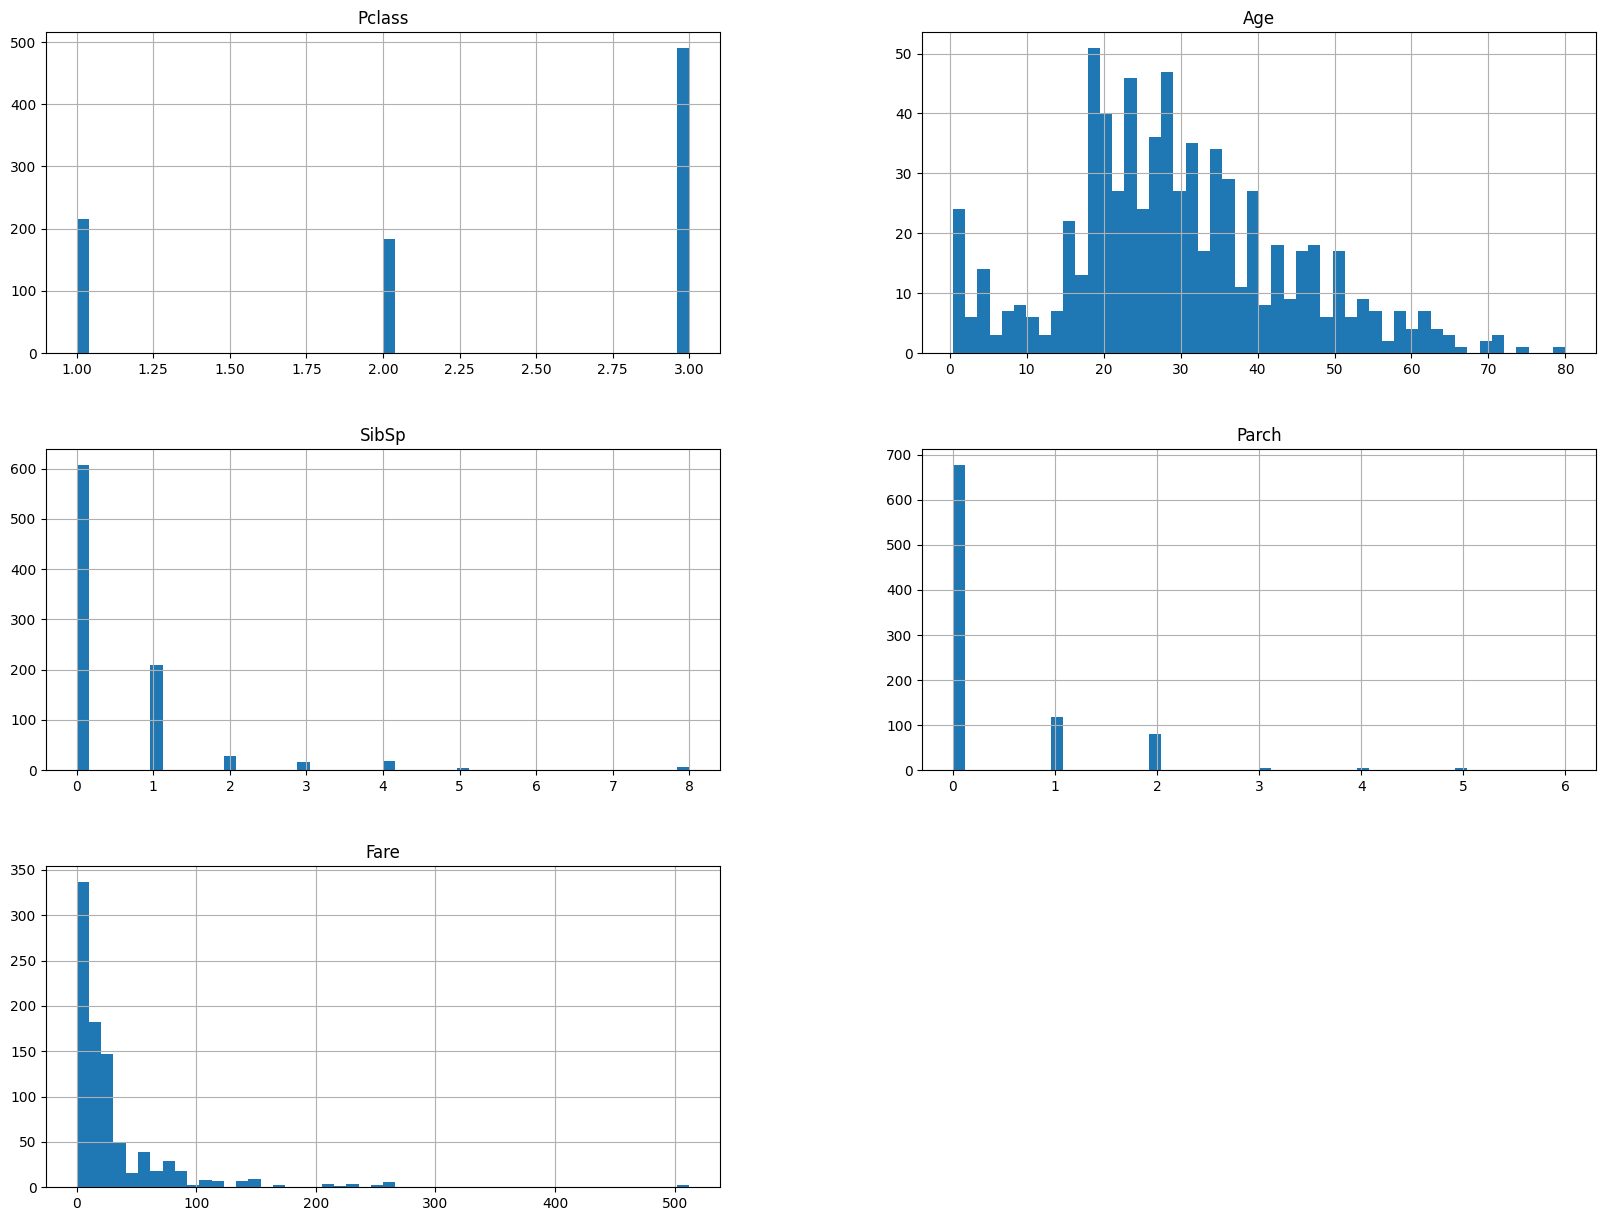

In [8]:
import matplotlib.pyplot as plt
trainfixed.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

encoder_ = OrdinalEncoder()
lista = ["Sex", "Embarked"]
trainfixed[lista]= encoder_.fit_transform(trainfixed[lista])
imputer_ = SimpleImputer(strategy='median')
trainfixed[['Age','Embarked']] = imputer_.fit_transform(trainfixed[['Age','Embarked']])
trainfixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


## Reducción de dimensión con PCA

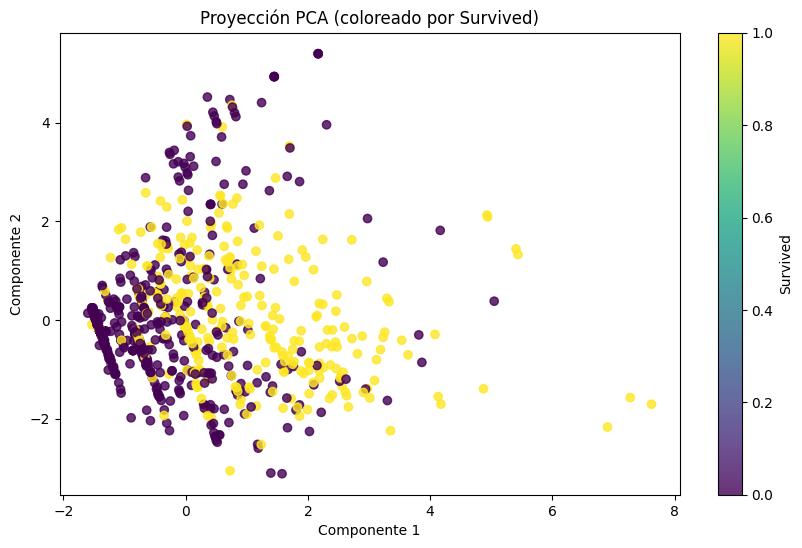

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ytrain = train1['Survived']  
scaler = StandardScaler()
Xz = scaler.fit_transform(trainfixed.select_dtypes(include=['number']))  # asegura solo numéricas
Z = PCA(n_components=2).fit_transform(Xz)  # 2D para graficar

plt.figure(figsize=(10,6))
scatter = plt.scatter(Z[:,0], Z[:,1], c=ytrain, alpha=0.8)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección PCA (coloreado por Survived)')
cbar = plt.colorbar(scatter)
cbar.set_label('Survived')
plt.show()


## Con RAPIDS 

In [11]:
from cuml.manifold import UMAP
import time

umap = UMAP(
    n_neighbors=500,     # más pequeño => preserva estructura local
    min_dist=0.2,       # menor => clusters más compactos
    n_components=2,     # proyección 2D
#    metric="euclidean", # métrica por defecto
#    init="spectral",    # inicialización estable
#    random_state=42
)
scaler2 = StandardScaler()
z = umap.fit_transform(scaler2.fit_transform(trainfixed))
z = np.asarray(z)
z

[2025-10-25 21:22:23.947] [CUML] [info] Building knn graph using brute force


array([[-5.300812  , -3.9003983 ],
       [-1.405241  ,  0.7554245 ],
       [ 0.11242676, -1.8598213 ],
       ...,
       [-2.0428286 , -2.1485357 ],
       [-1.75527   ,  1.9162273 ],
       [-1.4951773 ,  3.5172367 ]], dtype=float32)

In [12]:
ytrain1=np.asarray(ytrain)
ytrain1 

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

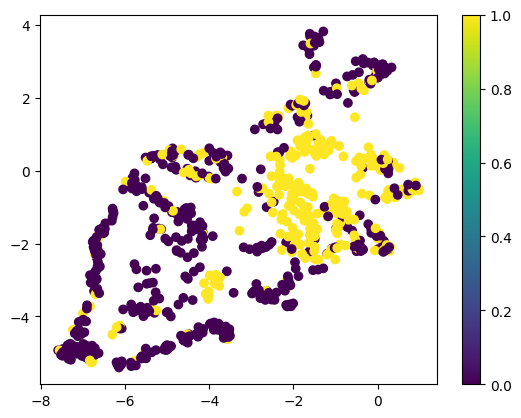

In [13]:
plt.scatter(z[:,0],z[:,1],c=ytrain1)
plt.colorbar()
plt.show()

## Entrenamiento y evaluación

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [15]:
import os, warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_curve, auc
)
from sklearn.utils.multiclass import unique_labels

# ---- carpeta de resultados
os.makedirs("results", exist_ok=True)

# ---- guardar figuras (quita download si no usas Colab)
def save_fig(path_img, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print("Guardado:", path)


In [16]:
def plot_confusion_matrix_pct(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    """
    Matriz de confusión normalizada por filas (en %) con anotaciones.
    classes: array/list con nombres en el orden de las etiquetas (p.ej. ['No sobrevivió','Sobrevivió'])
    """
    if not title:
        title = 'Matriz de confusión'

    cm = confusion_matrix(y_true, y_pred, normalize="true") * 100.0
    classes = np.array(classes)[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots(figsize=(6.5, 5.5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='Etiqueta original',
        xlabel='Predicción'
    )

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.1f'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black"
            )
    fig.tight_layout()
    return ax


In [17]:
def roc_auc_binary(y_true, y_score, title='ROC binaria', path_img=None, fig_id=None):
    """
    y_score: probas de clase positiva (shape [n,]) o decisión continua para clase positiva.
    """
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:0.3f})', linewidth=2)
    plt.plot([0,1], [0,1], 'k--', linewidth=1)
    plt.xlim([0,1]); plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(title); plt.legend(loc='lower right')
    if path_img and fig_id:
        save_fig(path_img, fig_id)
    plt.show()
    return roc_auc


In [18]:
def cm_with_report(y_true, y_pred, class_names, model_title,
                   print_report=True, save_report_path=None):
    """
    Dibuja la matriz de confusión (normalizada en %) y devuelve:
    - acc: accuracy en test
    - report: classification_report como string (texto)

    Si print_report=True, lo imprime en consola.
    Si save_report_path no es None, lo guarda a un .txt.
    """
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names, digits=3)

    # Matriz normalizada por filas (en %)
    cm = confusion_matrix(y_true, y_pred, normalize='true') * 100.0

    # --- SOLO HEATMAP (sin texto debajo)
    plt.figure(figsize=(6.5, 5.5), dpi=120)
    ax = sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues', cbar=True,
                     xticklabels=class_names, yticklabels=class_names,
                     annot_kws={'fontsize':9})
    ax.set_xlabel('Predicción'); ax.set_ylabel('Etiqueta original')
    ax.set_title(f'{model_title}  |  ACC = {acc*100:.1f} %', pad=10)
    ax.tick_params(axis='x', rotation=35); ax.tick_params(axis='y', rotation=0)
    plt.tight_layout()
    plt.show()

    if print_report:
        print(report)

    if save_report_path is not None:
        with open(save_report_path, 'w', encoding='utf-8') as f:
            f.write(report)

    return acc, report


In [19]:
#Particion entrenamiento y evaluación
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, Ytrain,ytest = train_test_split(trainfixed,ytrain,test_size=0.3, random_state=123)
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
416,2,0.0,34.0,1,1,32.5000,2.0
801,2,0.0,31.0,1,1,26.2500,2.0
512,1,1.0,36.0,0,0,26.2875,2.0
455,3,1.0,29.0,0,0,7.8958,0.0
757,2,1.0,18.0,0,0,11.5000,2.0


In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

#se crean listas de steps (pipelines)
steps=[[('nor', MinMaxScaler()),
        ('cla', KNeighborsClassifier())], #Pipeline1
       [('nor',  MinMaxScaler()),
        ('cla', SGDClassifier())],#Pipeline2
        [('nor',MinMaxScaler()),
         ('cla', SVC())]#Pipeline3
 ]

parameters = [{
              'cla__n_neighbors': [1,3,5,7,9,11], #Pipeline1 - hyperparametros
              },
              {
              'cla__alpha': [1e-3,1e-2,1e-1,1,10,1e2,1e3],#Pipeline2 - hyperparametros
              },
              {
             'cla__C': [1,10,1e2,1e3,1e4],
             'cla__gamma': [1e-3, 1e-2, 1e-1,1, 10]    #Pipeline2 - hyperparametros
              }
             ]

label_models = ['MinMax_KNeighbors','MinMax_SGD', 'MinMax_SVCrbf']

models = []
filename = 'results/titanic_models'
for i in range(len(steps)): # recorrer modelos según lista pipeline
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='accuracy',refit= True,verbose=10)#gridsearch para modelo i
    grid_search.fit(Xtrain, Ytrain)
    #mejor modelo entrenado
    models += [grid_search] #guardar modelos
    joblib.dump(models,filename+".pkl")

modelo 1/3
Fitting 5 folds for each of 6 candidates, totalling 30 fits
modelo 2/3
Fitting 5 folds for each of 7 candidates, totalling 35 fits
modelo 3/3
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/6] START cla__n_neighbors=1..........................................
[CV 1/5; 1/6] END ...........cla__n_neighbors=1;, score=0.752 total time=   0.0s
[CV 5/5; 1/6] START cla__n_neighbors=1..........................................
[CV 5/5; 1/6] END ...........cla__n_neighbors=1;, score=0.742 total time=   0.0s
[CV 1/5; 2/6] START cla__n_neighbors=3..........................................
[CV 1/5; 2/6] END ...........cla__n_neighbors=3;, score=0.832 total time=   0.0s
[CV 2/5; 2/6] START cla__n_neighbors=3..........................................
[CV 2/5; 2/6] END ...........cla__n_neighbors=3;, score=0.760 total time=   0.0s
[CV 3/5; 2/6] START cla__n_neighbors=3..........................................
[CV 3/5; 2/6] END ...........cla__n_neighbors=3;, score=

## Validación Cruzada con los mejores modelos

In [21]:
ind = models[2].cv_results_['mean_test_score'].argmax()#encontrar rendimiento más alto sobre CV del gridsearch en test
models[i].cv_results_['mean_test_score'][i]

0.7817548387096774

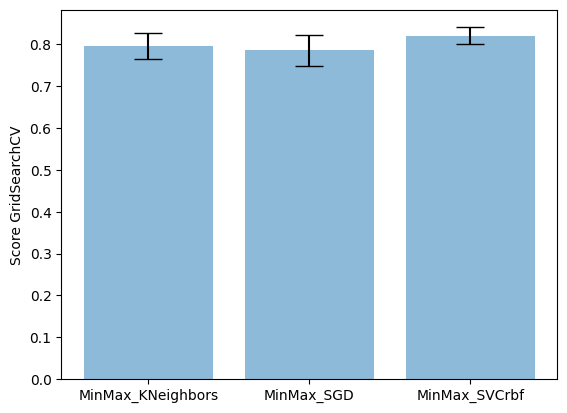

['MinMax_KNeighbors', 'MinMax_SGD', 'MinMax_SVCrbf']
[[0.795 0.785 0.82 ]
 [0.031 0.037 0.02 ]]


In [22]:
#recorrer modelos
bars_ = np.zeros((2,len(models)))#arreglo de barras para graficar mejores modelos en promedio con std
for i in range(len(models)):
  ind = models[i].cv_results_['mean_test_score'].argmax()#se determina el mejor score de clasificación
  bars_[0,i] = models[i].cv_results_['mean_test_score'][ind]#guardar score promedio del mejor modelo
  bars_[1,i] = models[i].cv_results_['std_test_score'][ind]#guardar std del mejor modelo

plt.bar(np.arange(len(models)), bars_[0], yerr=bars_[1], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Score GridSearchCV')
plt.xticks(np.arange(len(models)))
plt.gca().set_xticklabels(label_models)
plt.show()

print(label_models)
print(np.round(bars_,3))

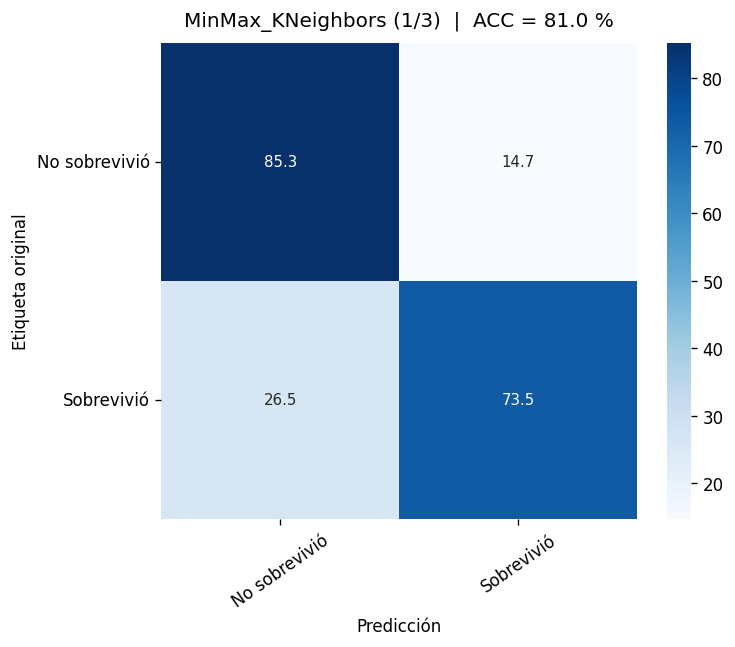

               precision    recall  f1-score   support

No sobrevivió      0.848     0.853     0.850       170
   Sobrevivió      0.742     0.735     0.738        98

     accuracy                          0.810       268
    macro avg      0.795     0.794     0.794       268
 weighted avg      0.809     0.810     0.809       268



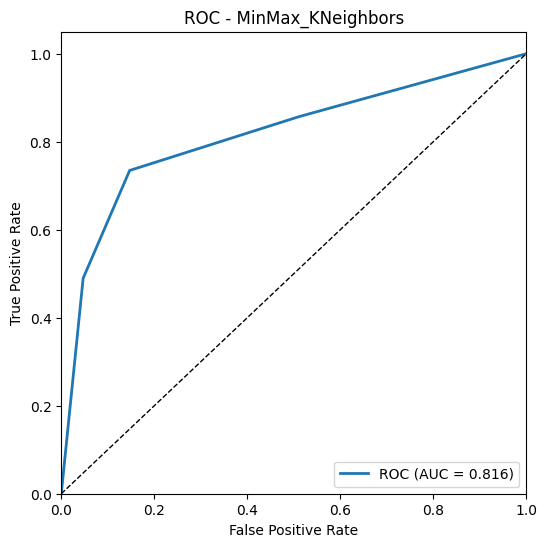

AUC = 0.816


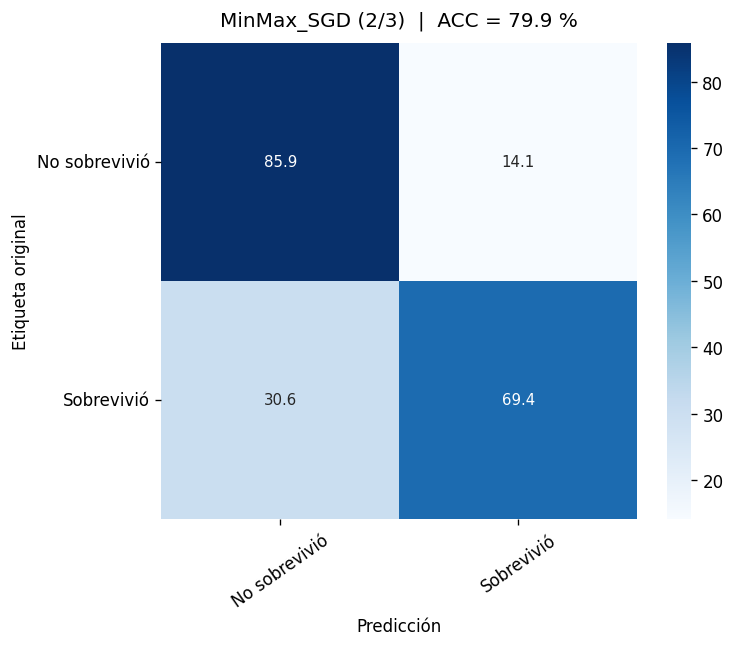

               precision    recall  f1-score   support

No sobrevivió      0.830     0.859     0.844       170
   Sobrevivió      0.739     0.694     0.716        98

     accuracy                          0.799       268
    macro avg      0.784     0.776     0.780       268
 weighted avg      0.796     0.799     0.797       268



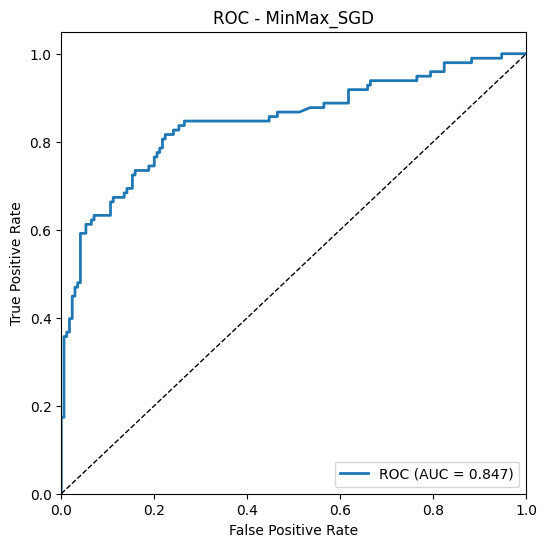

AUC = 0.847


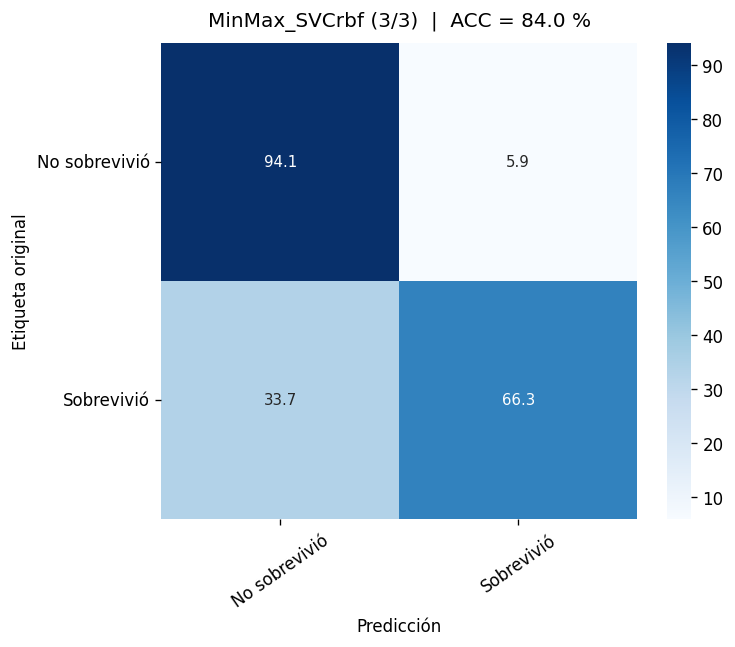

               precision    recall  f1-score   support

No sobrevivió      0.829     0.941     0.882       170
   Sobrevivió      0.867     0.663     0.751        98

     accuracy                          0.840       268
    macro avg      0.848     0.802     0.816       268
 weighted avg      0.843     0.840     0.834       268



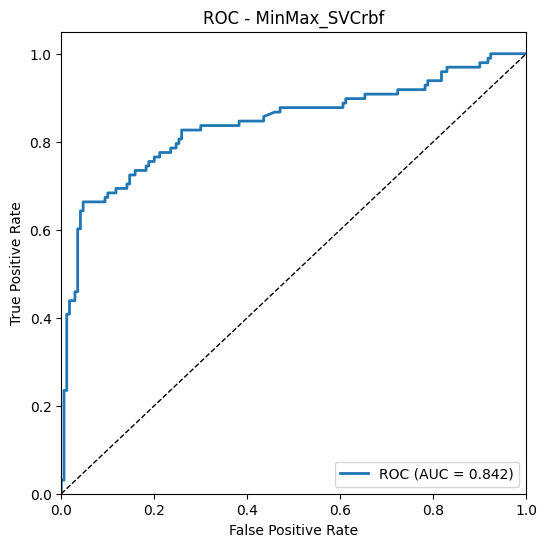

AUC = 0.842


In [23]:
class_names = ['No sobrevivió', 'Sobrevivió']

my_model_loaded = joblib.load('results/titanic_models.pkl')

for i, grid in enumerate(my_model_loaded):
    name = label_models[i] if i < len(label_models) else f'Modelo {i+1}'
    best_est = grid.best_estimator_

    # --- predicciones de clase (para matriz y métricas por clase)
    y_pred = best_est.predict(Xtest)

    # --- figura tipo "tu ejemplo" (heatmap + classification_report)
    cm_with_report(ytest, y_pred, class_names, model_title=f'{name} ({i+1}/{len(my_model_loaded)})')

    # --- ROC-AUC binaria (opcional)
    try:
        # preferimos probabilidad si existe:
        if hasattr(best_est, "predict_proba"):
            y_score = best_est.predict_proba(Xtest)[:, 1]  # proba de clase positiva (1 = sobrevivir)
        else:
            y_score = best_est.decision_function(Xtest)    # score continuo
        auc_val = roc_auc_binary(ytest, y_score, title=f'ROC - {name}')
        print(f'AUC = {auc_val:.3f}')
    except Exception as e:
        print(f'No se pudo calcular ROC para {name}: {e}')